## WordEmbeddingMatrices

A good example of where an x_min must be specified

#### Take the Glove Word Embeddings and form a correlation matrix

$$\mathbf{X}=\mathbf{E}^{T}\mathbf{E},\;\;\;shape=(300\times 300)$$  


#### Fit the eigenvalue distribution $\rho(\lambda)$ to a power law $\lambda^{-\alpha}$

$$\mathbf{X}\mathbf{v}=\lambda\mathbf{v}$$

$$\rho(\lambda)\sim\lambda^{-\alpha}$$

#### If we do a raw fit, we get

- $\alpha=5.2$

#### But there is rank collapse (lots of very small, near zero eigenvalues)

$$\lambda\sim 0$$


#### If we ignore the rank collapse, and set xmin=0.1, we get

- $\alpha=3.0$

#### But on further inspection, its a pretty bad fit

### The Big Question...does the Power Law fit and Rank Collapse affect the quality of the Vectors ?

Not sure...


In [1]:
import numpy as np
import powerlaw

import os 
from tqdm import tqdm_notebook as tqdm


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing Jupyter notebook from RMT_Util.ipynb


/Users/charleshmartin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
scipy version 1.1.0
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [4]:
GLOVE_DIR = "/Users/charleshmartin/work-tmp/glove"

In [5]:
embeddings_mat = np.zeros([400000,300])
embeddings_mat.shape

(400000, 300)

#### Read the Glove Embedding Matrix into a large matrix E

E = embeddings_mat



In [6]:
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'))
for iw, line in enumerate(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_mat[iw] = coefs
f.close()

#### Form the correlation matrix, which is (300 x 300)

- and normalize by 1/N 

In [7]:
X =  np.dot(embeddings_mat.T,embeddings_mat)

In [8]:
X = (1.0/400000.0)*X

#### Get all the eigenvales 

evals = $[\lambda]$

In [9]:
evals = np.linalg.eigvals(X)

#### Plot the histogram , which is $\rho(\lambda)$

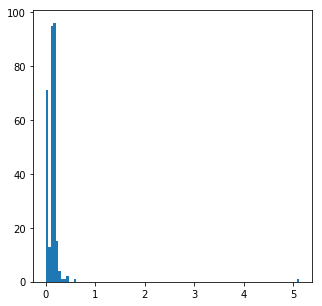

In [10]:
plt.hist(evals, bins=100);

#### Do a simple power law fit of $\rho(\lambda)\sim\lambda^{-\alpha}$ to find $\alpha$

In [11]:
fit = powerlaw.Fit(evals, xmax=np.max(evals))

Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [12]:
fit.alpha

5.231594347585907

### The exponent is very high $\alpha > 4$

### Because there is Rank Collapse..

we need to remove the small eigenvalues...the peak near 0

(0, 2)

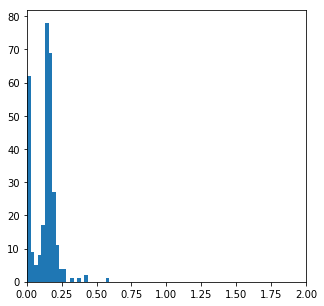

In [13]:
plt.hist(evals, bins=200);
plt.xlim(0,2)

### Remove all $\lambda<0.1$ and redo the PowerLaw fit

(0, 2)

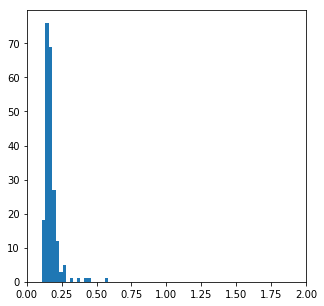

In [14]:
plt.hist(evals[evals>=0.1], bins=200);
plt.xlim(0,2)

In [17]:
fit = powerlaw.Fit(evals[evals>=0.1], xmin=0.1)
fit.alpha

2.933789276058489

### Now the $\alpha$ is more reasonable

We can now check more details

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha 2.93379, D 0.321258, best_pl  PL


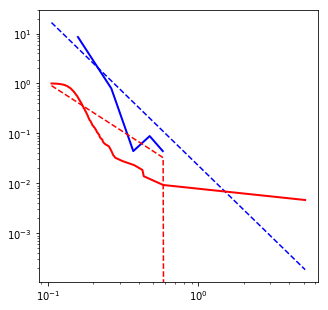

In [18]:
RMT_Util.fit_and_plot_powerlaw(evals, verbose=True, xmin=0.1)

### Not a great fit

- The D value is very high...should be much closer to 0

- The solid and dotted lines should overlap

### Is this just MP?

Q is so large that the MP fit is very spiked

In [22]:
E = embeddings_mat
M, N = np.min(E.shape), np.max(E.shape)
Q = N/M

% spikes outside bulk 0.67
% sigma 0.6399


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


(0, 35)

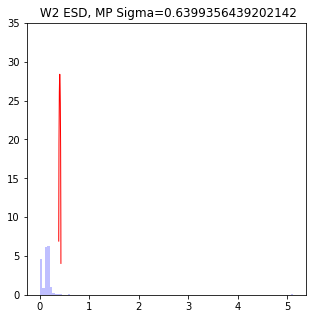

In [36]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals,Q=Q, num_spikes=2)
plt.ylim([0,35])

### Is this MP?  Very hard to tell with the resolution but doubtful

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 7.14
% sigma 0.4524


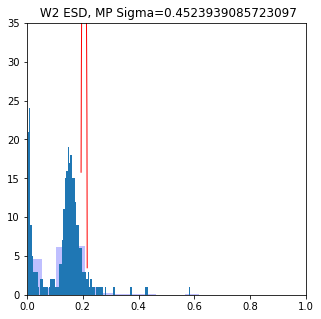

In [49]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals,Q=Q, num_spikes=20)
plt.ylim([0,35])
plt.xlim([0,1])
plt.hist(evals,bins=1000);